<a href="https://colab.research.google.com/github/AdityaNikhil/Neural_Networks/blob/master/CIFAR_Classification_Using_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective is to classify images in Cifar Dataset.
#### (In this dataset, there are 50k random images)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from IPython.display import clear_output

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [70]:
print("Shape of features :",x_train.shape)
print("Shape of Target :",y_train.shape)

Shape of features : (50000, 32, 32, 3)
Shape of Target : (50000, 1)


## As we can see above that the shape of features are unflattened, we need to make them flattened!

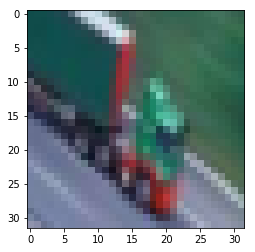

In [71]:
plt.imshow(x_train[50])

In [0]:
# Flattening the images
X_train = []
for i in range(len(x_train)):
  X_train.append(np.ndarray.flatten(x_train[i]))
X_train = np.array(X_train)

In [73]:
print("Shape of features :",X_train.shape)
print("Shape of Target :",y_train.shape)

Shape of features : (50000, 3072)
Shape of Target : (50000, 1)


In [0]:
#OneHot encoding
def OneHot(x):
  zeros = [0]*10
  for i in range(len(zeros)):
    zeros[x] = 1
  return zeros

Y_OH = []
for i in range(len(y_train)):
   Y_OH.append(OneHot(y_train[i][0]))
Y_OH = np.array(Y_OH)

In [0]:
#Preparing Tensorflow Placeholder
X_PH = tf.placeholder(tf.float64,[None,len(X_train.T)])
Y_PH = tf.placeholder(tf.float64,[None,10])

In [0]:
#Preparing Tensorflow Variables
m1 = np.random.randn(3072,3072)
m1 = tf.Variable(m1)
c1 = np.random.randn(1,1)
c1 = tf.Variable(c1)

m2 = np.random.randn(3072,3072)
m2 = tf.Variable(m2)
c2 = np.random.randn(1,1)
c2 = tf.Variable(c2)

m3 = np.random.randn(3072,3072)
m3 = tf.Variable(m3)
c3 = np.random.randn(1,1)
c3 = tf.Variable(c3)

m4 = np.random.randn(3072,3072)
m4 = tf.Variable(m4)
c4 = np.random.randn(1,1)
c4 = tf.Variable(c4)

m5 = np.random.randn(3072,10)
m5 = tf.Variable(m5)
c5 = np.random.randn(1,1)
c5 = tf.Variable(c5)

In [0]:
L1Out = tf.nn.sigmoid(tf.matmul(X_PH,m1))+c1
L2Out = tf.nn.sigmoid(tf.matmul(L1Out,m2))+c2
L3Out = tf.nn.sigmoid(tf.matmul(L2Out,m3))+c3
L4Out = tf.nn.sigmoid(tf.matmul(L3Out,m4))+c4
L5Out = tf.nn.softmax(tf.matmul(L4Out,m5))+c5

## Why use SOFTMAX on final layer?
Softmax Activation Function is usually recommended when the classes are more than 2.
$$ \sigma(z)_i=\frac{e^{z_i}}{\sum{e^{z_i}}}$$
Softmax Function use a function that takes as input a vector of K real numbers, and normalises it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. (i.e) , prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.
### Source : https://en.wikipedia.org/wiki/Softmax_function
### https://github.com/ml4a/ml4a-guides/blob/master/notebooks/keras_classification.ipynb
#### (For more info., checkout above links)


In [0]:
#Setting up tensor engine
cost = tf.reduce_mean((Y_PH - L5Out)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
minimizer = optimizer.minimize(cost)

init = tf.global_variables_initializer()
s = tf.Session()
s.run(init)

# Comparison of Error with and without applying Softmax

In [107]:
############################### WITHOUT SOFTMAX ON LAST LAYER ####################################
error = []
batch = 100
for i in range(100):
  random_indices = np.random.randint(0,len(x_train),size = batch)
  Dict = {Y_PH : Y_OH[random_indices],X_PH : X_train[random_indices]}
  s.run(minimizer,feed_dict = Dict)
  clear_output(True)
  error.append(s.run(cost,feed_dict = Dict))
  print("Iteraion :", i , "Error :",s.run(cost,feed_dict = Dict))

Iteraion : 99 Error : 1.839884820319516


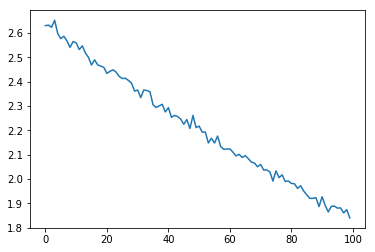

In [108]:
plt.plot(error)
plt.show()

In [112]:
#################################### WITH SOFTMAX ON LAST LAYER ######################################
error = []
batch = 100
for i in range(100):
  random_indices = np.random.randint(0,len(x_train),size = batch)
  Dict = {Y_PH : Y_OH[random_indices],X_PH : X_train[random_indices]}
  s.run(minimizer,feed_dict = Dict)
  clear_output(True)
  error.append(s.run(cost,feed_dict = Dict))
  print("Iteraion :", i , "Error :",s.run(cost,feed_dict = Dict))

Iteraion : 99 Error : 0.2438174730357906


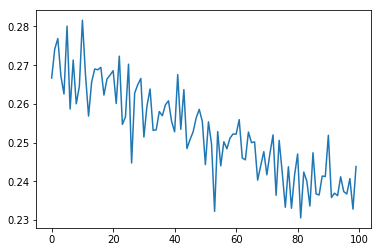

In [113]:
plt.plot(error)
plt.show()

## Conclusion : We can conclude by seeing above error values that Softmax is more optimal or better to use when there are more than 2 classes.

##### (May vary in CNN, will talk about it in future)